# Trends determining the success of movies.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> With new movies releasing everyday all over the World int different languages ranging from regional to global languages.Here   in this project we are going to discuss the factors which determine the success of the movies.The data has been taken from     the kaggle dataset and has been thouroughly studied to interpret the following results.

> You may have wondered which genre does best in terms of revenue collection,movies of which genres are most produced,do movies   with higher budget do better at collection or whether the duration of the movie has any affect in it's sucess.

> In this project, we will examine the real information collected from the kaggle database to answer these questions and          visualise the results as well by applying the data science techniques learned from the udacity data science nanodegree          program. 


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data,check for the problems by studying it,and then trim and clean our dataset for analysis.

### General Properties

> In the beginning of the following project,we load the movie data set using the pandas module of python in the dataframe and print out a few lines in it.Then we take a look at the number of rows and columns present in the database,the number of missing values in the database.We will also study the database closely by checking the description of the dataframe such as the minimum and maximum value of each column,mean of each column,etc.

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (Replace this with more specific notes!)

> In this part we will make the necessary changes in the database required for the analysis of data more clearly such as dropping of unneccessary columns in the database which does not add any values to our analysis,filling up of null values with the mean of the column,designing a comparison criteria to solve the question,etc.

> We will start off by dropping the irrelevant data which won't help in our analysis.

In [6]:
df.drop(['id','imdb_id','original_title','homepage','tagline','overview','keywords','release_date'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [8]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> We will fill all the null values present in the database with the mean of that respective column.

> Upon further investigation of the datas in the database,we notice that the minimum value of the columns namely runtime,revenue,revenue_adj,budget and budjet_adj is 0.00 which was not practically possible so also have to replace those 0 values with the mean values of the respective columns. 

In [9]:
df.fillna(df.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [10]:
df['budget'] = df['budget'].replace(0,df.budget.mean())  

In [11]:
df['budget_adj'] = df['budget_adj'].replace(0,df.budget_adj.mean())  

In [12]:
df['revenue'] = df['revenue'].replace(0, df.revenue.mean())  

In [13]:
df['runtime'] = df['runtime'].replace(0, df.runtime.mean())  

In [14]:
df['revenue_adj'] = df['revenue_adj'].replace(0, df.revenue_adj.mean()) 

> We will drop all the rows from the dataframe which can not be replaced or filled with mean values, so that no null vaolues will be present in our dataframe.

> We will create two new dataframes namely hit and flop created on the basis of the movies performance in the box office which is evaluated on the simple fact that a movie which earns more than it's budget is hit and which does not is deemed as a flop. 

In [15]:
new_data=df.dropna(axis=0,how='any')

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9773 non-null float64
budget                  9773 non-null float64
revenue                 9773 non-null float64
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null float64
genres                  9773 non-null object
production_companies    9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.0+ MB


In [17]:
hit=new_data.query('budget < revenue')
hit.shape

(8035, 13)

In [18]:
flop=new_data.query('budget > revenue')
flop.shape

(1735, 13)

> We then check whether the columns are duplicated in the hit and flop dataframe.In case any duplicated rows is found we drop the duplicate rows.

> We will make two new dataframes with a new column added named performance with the values hit and flop based on the query result performed earlier.

In [19]:
sum(hit.duplicated())

0

In [20]:
sum(flop.duplicated())

1

In [21]:
flop.drop_duplicates(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
sum(flop.duplicated())

0

In [23]:
movie_hit = np.repeat('hit',hit.shape[0])

# create color array for white dataframe
movie_flop = np.repeat('flop',flop.shape[0])


In [24]:
hit['performance'] = movie_hit
hit.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,performance
0,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,hit
1,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,hit


In [25]:
flop['performance'] = movie_flop
flop.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,performance
57,2.575711,60000000.0,30418560.0,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106.0,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,696,5.3,2015,5.519998e+07,2.798506e+07,flop
59,2.550747,70000000.0,17752940.0,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133.0,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,584,5.0,2015,6.439997e+07,1.633270e+07,flop


> After assigning the performance columns to both the new dataframes with hit and flop values,we will merge both the data sets into one new dataframe.

> We will save the newly created dataframe to a new csv file created in order to retain the changes made in the csv file.

In [26]:
#append dataframes
new_rows = hit.append(flop,sort=False,ignore_index=True)
# view dataframe to check for success
new_rows.head(2)

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,performance
0,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,hit
1,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,hit


In [27]:
new_rows.to_csv('tmdb_edited.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Do movies with higher budget fare better in the box office?

In [28]:
hit.budget.mean()

22726094.121735487

In [29]:
flop.budget.mean()

25945133.83803181

Text(0,0.5,'budget')

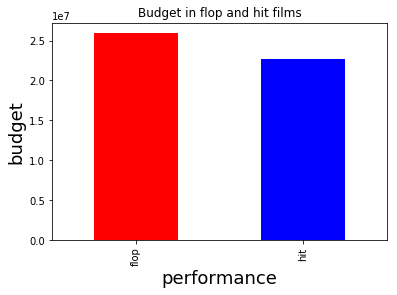

In [30]:
colors=['red','blue']
new_rows.groupby('performance')['budget'].mean().plot(kind='bar',title='Budget in flop and hit films',color=colors)
plt.xlabel('performance',fontsize=18)
plt.ylabel('budget',fontsize=18)

> As we can see from the chart above that films with more budget do not necessarily do well in the box office.It is observed that the movies deemed as hit have a low mean budget than the movies deemed as flop.

> Therefore,we can clearly state that the budget plays no role in determining the success of the movie.

### Does the duration of movie affect the success of the movie?

In [31]:
hit.runtime.mean()

102.58729573393414

In [32]:
flop.runtime.mean()

105.24625144175317

Text(0,0.5,'runtime')

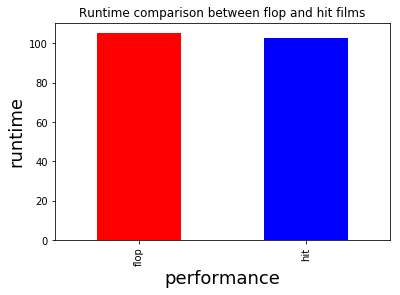

In [33]:
colors=['red','blue']
new_rows.groupby('performance')['runtime'].mean().plot(kind='bar',title='Runtime comparison between flop and hit films',color=colors)
plt.xlabel('performance',fontsize=18)
plt.ylabel('runtime',fontsize=18)

> It can be observed from the data that the mean runtime of both hit and flop movies is almost same and has a difference of less than 3 minutes.So,we can safely say that the runtime for both the movies has no effect on the box office performance.

### Do movies with high popularity also flop in the box-office?

In [34]:
hit.popularity.max()

32.985762999999999

In [35]:
flop.popularity.max()

3.9904879999999996

Text(0,0.5,'budget')

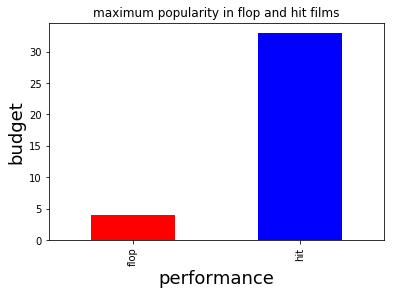

In [36]:
colors=['red','blue']
new_rows.groupby('performance')['popularity'].max().plot(kind='bar',title='maximum popularity in flop and hit films',color=colors)
plt.xlabel('performance',fontsize=18)
plt.ylabel('budget',fontsize=18)

> From the following performance chart it can clearly be stated that movies which were flop do not have popularity more than 4 while the popularity for hit movies go as high as 32.

> Hence,we can conclude that the movies will higher popularity have a high chance of being a sucessful one than the ones with lower popularity.

### Which genres are most liked by the audience?

> We will create a function to separate the different genres of every movie and then make a new dataframe to compare the revenue of movies based on genres and decide which genres are more preferred by the audience and which do they love to watch.

In [37]:
def split_column_value(ori_df, column_name, revenue_column_name, separator='|'):
    '''
    INPUT - ori_df  - pandas dataframe -  original dataframe
            column_name - string - the name of the column you would like to splite the value
            separator - string - The is a delimiter. The string splits at this specified separator. If is not provided then | is the separator.
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    '''
    ori_df = ori_df.dropna(subset=['genres',revenue_column_name])
    df = pd.DataFrame(ori_df[column_name].str.split(separator).tolist()).stack()
    return df

In [38]:
temp1 = split_column_value(new_rows, 'genres','revenue_adj')
final = pd.DataFrame(temp1).reset_index()
final.head()

,level_0,level_1,0
0,0,0,Action
1,0,1,Adventure
2,0,2,Science Fiction
3,0,3,Thriller
4,1,0,Action


>In the table above level_0 represents the index number of the movie in the database while the level_1 indicates the different kinds of genres of that movie which was separated by a '|' in the original dataframe.
 
> We created a new function which will add another column to our newly created dataframe which will show the money earned by the movie and assign that money to all the genres associated to the movie. 

In [39]:
def add_revenue_column(df,ori_df,revenue_column_name):
    '''
    Input:
    df -> DataFrame in which we need to append new column of salary
    ori_df -> Original DataFram from which 'df' is extracted
    salary_column_name -> Name of salary column in ori_df
    
    Output:
    New DataFrame with ConvertedComp appended
    '''
    ori_df = ori_df.dropna(subset=['genres',revenue_column_name]).reset_index()
    revenue_adj = []
    s = ori_df[revenue_column_name]
    for index, row in df.iterrows():
        
        revenue_adj.append(s[row['level_0']])
        
    df['revenue_adj']=revenue_adj
    return df

In [40]:
df_final = add_revenue_column(final,new_rows,'revenue_adj')
df_final.head()

,level_0,level_1,0,revenue_adj
0,0,0,Action,1.392446e+09
1,0,1,Adventure,1.392446e+09
2,0,2,Science Fiction,1.392446e+09
3,0,3,Thriller,1.392446e+09
4,1,0,Action,3.481613e+08


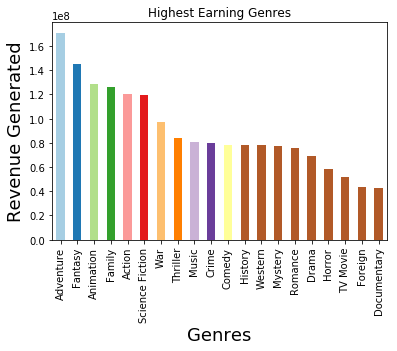

In [41]:
df_final.groupby(0).revenue_adj.mean().sort_values(ascending=False).plot(kind='bar',title="Highest Earning Genres",color=plt.cm.Paired(np.arange(len(new_rows))));
plt.xlabel('Genres',fontsize=18);
plt.ylabel('Revenue Generated',fontsize=18);

> We plotted the graph upon the basis of money earned against each of the genres and decide that which genre has been liked more by the audience irrespective of time because we are taking the adjusted revenue column for comparison.

> It can be concluded from the above chart that the adventure genre has always done better at the box office collections followed by fantasy and animation.While,the tv movie,foreign and documentary genres has always earned less than the rest of the genres.

### Which Genre movies has been most produced in the database?

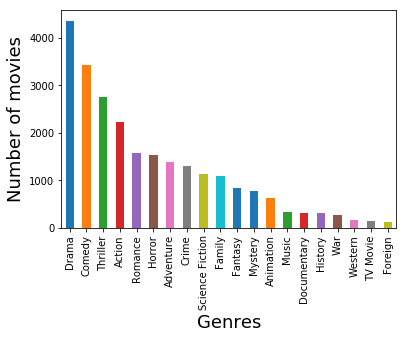

In [42]:
df_final[0].value_counts().plot.bar();
plt.ylabel('Number of movies',fontsize=18);
plt.xlabel('Genres',fontsize=18);

> The chart above is a univariate bar chart of the genres which shows how many numbers of each movies based on the following     genres has been released. The observation can be made that the movies belonging to the Drama genre followed by the comedy       genre has been higher while the Foreign genre preceeded by the TV Movie genre has been the lowest.

> We can clearly observe from the above two graphs that although the Drama genre has been used more often but it has not gained   more money in comparison to other genres present.Adventure genre although being the highest grosser of all times stands 7th     in the above list.  

<a id='conclusions'></a>
## Conclusions

> In this project we have studied the dataset and finally came to answer the questions which we started keeping in mind. During the following project we found out the following points:-
<ul>
    <li>The runtime of the movies don't have any effect on the success of the movies.</li>
    <li>The budget does not play very high role in determining the success of the movie as contrary to the popular belief we           can see that movies with low budget have higher chance of being successful.</li>
    <li>The movies with higher popularity have higher chance of being a successful movie because we can see that no flop movie         has more popularity than 4.</li>
    <li>The Adventure genre has earned the highest among all others while the documentary genre the lowest.We can see the       
        earning for the rest of the genres through chart as well.</li>
    <li>The Drama genre even after not being in the top 10 grossers of all time has been the most widely produced genre so             far</li> 
</ul>

> The data provided to us is not sufficient to gather a lot of information and insights and causes us many limitations while     determining several factors.A lot of rows in columns revenue,budget and runtime where filled with 0 which has to be replaced   with the mean value of that column but if the actual value woukld have been present then more accurate results would have       been  obtained.

> The popularity could not solely decide or have a say on the success of the movie because for movies with lower popularity       points can be a both a hit or a flop film,but it can be clearly stated for movies with higher popularity than 4.

> There were few null values in the dataset which could not have been filled with the mean values so has to be dropped because   of which a loss of precision would have occurred.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0